In [2]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [3]:
dropout = np.random.rand(19,19,(728*2))
dropout_placeholder = tf.placeholder(tf.float32, shape=(None,19,19,1456))

In [4]:
saliency_conv = tf.layers.conv2d(dropout_placeholder, 64, (3,3), activation='relu')

pierce_conv = tf.layers.conv2d(saliency_conv, 1, (1,1), activation='relu')

pierce_conv


Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.


<tf.Tensor 'conv2d_1/Relu:0' shape=(?, 17, 17, 1) dtype=float32>

In [59]:
# Prior - 17x17 Gaussian matrix

def gaussian2d(dim, mean=0, std=1):
    x = np.linspace(-1, 1, dim+1)
    gaussian1d = np.diff(st.norm.cdf(x, loc=mean, scale=std))
    gaussian2d = np.outer(gaussian1d, gaussian1d)
    return gaussian2d
          
prior = gaussian2d(17,std=0.5)


(17, 17)


In [60]:
output = tf.math.multiply(pierce_conv,prior)

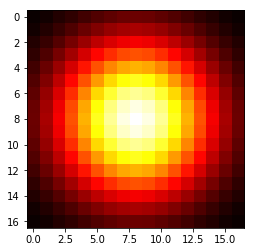

In [61]:
sess = tf.Session()
with sess.as_default():
    plt.imshow(prior, cmap='hot')
    plt.show()